In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
DATA_PATH = "/data/datasets/"
%matplotlib inline
random_state = 42
n_samples = 10_000

sklearn datasets
- https://scikit-learn.org/stable/datasets/sample_generators.html#generators-for-classification-and-clustering 
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets


general:

- https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

# Helper Functions:

In [ ]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    df_std = df.copy()
    for column in ['x-coord','y-coord', 'z-coord', 'x2-coord', 'x3-coord', 'x4-coord', 'x5-coord', 'x6-coord', 'x7-coord', 'x8-coord', 'x9-coord', 'x10-coord']:
        if column in df_std.columns:
            df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()        
    return df_std

# Create Datasets:

In [ ]:
from sklearn import datasets


noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=random_state)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
blobs5_2d = make_blobs(n_samples=n_samples, random_state=random_state, centers=5)
blobs5_3d = make_blobs(n_samples=n_samples, random_state=random_state, centers=5, cluster_std=1.0, n_features=3)
blobs3_noisy = make_blobs(n_samples=n_samples, random_state=random_state, centers=3, cluster_std=3.0)
blobs3_10d = make_blobs(n_samples=n_samples, random_state=random_state, centers=3, n_features=10)

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

In [ ]:
# z score transform everything
X,y = noisy_circles
noisy_circles_dataset = np.concatenate((X, y.reshape((X.shape[0], 1,))), axis=1)
noisy_circles_df = pd.DataFrame(noisy_circles_dataset, columns=["x-coord", "y-coord", "label"]).astype({'label': 'int32'})
noisy_circles_df = z_score(noisy_circles_df)

X,y = noisy_moons
noisy_moons_dataset = np.concatenate((X, y.reshape((X.shape[0], 1,))), axis=1)
noisy_moons_df = pd.DataFrame(noisy_moons_dataset, columns=["x-coord", "y-coord", "label"]).astype({'label': 'int32'})
noisy_moons_df = z_score(noisy_moons_df)

X,y = blobs
blobs_dataset = np.concatenate((X, y.reshape((X.shape[0], 1,))), axis=1)
blobs_df = pd.DataFrame(blobs_dataset, columns=["x-coord", "y-coord", "label"]).astype({'label': 'int32'})
blobs_df = z_score(blobs_df)

X,y = aniso
aniso_dataset = np.concatenate((X, y.reshape((X.shape[0], 1,))), axis=1)
aniso_df = pd.DataFrame(aniso_dataset, columns=["x-coord", "y-coord", "label"]).astype({'label': 'int32'})
aniso_df = z_score(aniso_df)

X,y = varied
varied_dataset = np.concatenate((X, y.reshape((X.shape[0], 1,))), axis=1)
varied_df = pd.DataFrame(varied_dataset, columns=["x-coord", "y-coord", "label"]).astype({'label': 'int32'})
varied_df = z_score(varied_df)

X,y = blobs5_2d
blobs5_2d_dataset = np.concatenate((X, y.reshape((X.shape[0], 1,))), axis=1)
blobs5_2d_df = pd.DataFrame(blobs5_2d_dataset, columns=["x-coord", "y-coord", "label"]).astype({'label': 'int32'})
blobs5_2d_df = z_score(blobs5_2d_df)

X,y = blobs5_3d
blobs5_3d_dataset = np.concatenate((X, y.reshape((X.shape[0], 1,))), axis=1)
blobs5_3d_df = pd.DataFrame(blobs5_3d_dataset, columns=["x-coord", "y-coord", "z-coord", "label"]).astype({'label': 'int32'})
blobs5_3d_df = z_score(blobs5_3d_df)

X,y = blobs3_noisy
blobs3_noisy_dataset = np.concatenate((X, y.reshape((X.shape[0], 1,))), axis=1)
blobs3_noisy_df = pd.DataFrame(blobs3_noisy_dataset, columns=["x-coord", "y-coord", "label"]).astype({'label': 'int32'})
blobs3_noisy_df = z_score(blobs3_noisy_df)

X,y = blobs3_10d
blobs3_10d_dataset = np.concatenate((X, y.reshape((X.shape[0], 1,))), axis=1)
blobs3_10d_df = pd.DataFrame(blobs3_10d_dataset, columns=["x-coord", 'x2-coord', 'x3-coord', 'x4-coord', 'x5-coord', 'x6-coord', 'x7-coord', 'x8-coord', 'x9-coord', 'x10-coord', "label"]).astype({'label': 'int32'})
blobs3_10d_df = z_score(blobs3_10d_df)


In [ ]:
# make sure z score applied correctly
datasets = [noisy_circles_df, noisy_moons_df, blobs_df, aniso_df, varied_df, blobs5_2d_df, blobs5_3d_df, blobs3_noisy_df, blobs3_10d_df]
for j, dataset in enumerate(datasets):
    for i in dataset.std()[:-1]:
        assert 0.99 < i < 1.01

In [ ]:
#TODO: Random sample from each datase to create initial datasets
# noisy_circles_df
clu0_pts = noisy_circles_df[noisy_circles_df['label'] == 0].sample(250, random_state=random_state+1) # purple cluster
clu1_pts = noisy_circles_df[noisy_circles_df['label'] == 1].sample(250, random_state=random_state+2) # cyan cluster
init_noisy_circles_df = pd.concat([clu0_pts,clu1_pts]).sample(frac=1, random_state=random_state)

## noisy_moons_df
clu0_pts = noisy_moons_df[noisy_moons_df['label'] == 0].sample(250, random_state=random_state+1) # purple cluster
clu1_pts = noisy_moons_df[noisy_moons_df['label'] == 1].sample(250, random_state=random_state+2) # cyan cluster
init_noisy_moons_df = pd.concat([clu0_pts,clu1_pts]).sample(frac=1, random_state=random_state)

## blobs_df
clu0_pts = blobs_df[blobs_df['label'] == 0].sample(100, random_state=random_state+1) # purple cluster
clu1_pts = blobs_df[blobs_df['label'] == 1].sample(100, random_state=random_state+2) # cyan cluster
clu2_pts = blobs_df[blobs_df['label'] == 2].sample(100, random_state=random_state+3) # yellow cluster
init_blobs_df = pd.concat([clu0_pts,clu1_pts,clu2_pts]).sample(frac=1, random_state=random_state)

## aniso_df
clu0_pts = aniso_df[aniso_df['label'] == 0].sample(100, random_state=random_state+1) # purple cluster
clu1_pts = aniso_df[aniso_df['label'] == 1].sample(100, random_state=random_state+2) # cyan cluster
clu2_pts = aniso_df[aniso_df['label'] == 2].sample(100, random_state=random_state+3) # yellow cluster
init_aniso_df = pd.concat([clu0_pts,clu1_pts,clu2_pts]).sample(frac=1, random_state=random_state)

## varied_df
clu0_pts = varied_df[varied_df['label'] == 0].sample(100, random_state=random_state+1) # purple cluster
clu1_pts = varied_df[varied_df['label'] == 1].sample(100, random_state=random_state+2) # cyan cluster
clu2_pts = varied_df[varied_df['label'] == 2].sample(100, random_state=random_state+3) # yellow cluster
init_varied_df = pd.concat([clu0_pts,clu1_pts,clu2_pts]).sample(frac=1, random_state=random_state)

## blobs5_2d_df
clu0_pts = blobs5_2d_df[blobs5_2d_df['label'] == 0].sample(50, random_state=random_state+1) # purple cluster
clu1_pts = blobs5_2d_df[blobs5_2d_df['label'] == 1].sample(50, random_state=random_state+2) # cyan cluster
clu2_pts = blobs5_2d_df[blobs5_2d_df['label'] == 2].sample(50, random_state=random_state+3) # yellow cluster
clu3_pts = blobs5_2d_df[blobs5_2d_df['label'] == 3].sample(50, random_state=random_state+3) # yellow cluster
clu4_pts = blobs5_2d_df[blobs5_2d_df['label'] == 4].sample(50, random_state=random_state+3) # yellow cluster
init_blobs5_2d_df = pd.concat([clu0_pts,clu1_pts,clu2_pts,clu3_pts,clu4_pts]).sample(frac=1, random_state=random_state)


## blobs5_3d_df
clu0_pts = blobs5_3d_df[blobs5_3d_df['label'] == 0].sample(50, random_state=random_state+1) # purple cluster
clu1_pts = blobs5_3d_df[blobs5_3d_df['label'] == 1].sample(50, random_state=random_state+2) # cyan cluster
clu2_pts = blobs5_3d_df[blobs5_3d_df['label'] == 2].sample(50, random_state=random_state+3) # yellow cluster
clu3_pts = blobs5_3d_df[blobs5_3d_df['label'] == 3].sample(50, random_state=random_state+3) # yellow cluster
clu4_pts = blobs5_3d_df[blobs5_3d_df['label'] == 4].sample(50, random_state=random_state+3) # yellow cluster
init_blobs5_3d_df = pd.concat([clu0_pts,clu1_pts,clu2_pts,clu3_pts,clu4_pts]).sample(frac=1, random_state=random_state)


## blobs3_noisy_df
clu0_pts = blobs3_noisy_df[blobs3_noisy_df['label'] == 0].sample(100, random_state=random_state+1) # purple cluster
clu1_pts = blobs3_noisy_df[blobs3_noisy_df['label'] == 1].sample(100, random_state=random_state+2) # cyan cluster
clu2_pts = blobs3_noisy_df[blobs3_noisy_df['label'] == 2].sample(100, random_state=random_state+3) # yellow cluster
init_blobs3_noisy_df = pd.concat([clu0_pts,clu1_pts,clu2_pts]).sample(frac=1, random_state=random_state)

## blobs3_10d_df
clu0_pts = blobs3_10d_df[blobs3_10d_df['label'] == 0].sample(100, random_state=random_state+1) # purple cluster
clu1_pts = blobs3_10d_df[blobs3_10d_df['label'] == 1].sample(100, random_state=random_state+2) # cyan cluster
clu2_pts = blobs3_10d_df[blobs3_10d_df['label'] == 2].sample(100, random_state=random_state+3) # yellow cluster
init_blobs3_10d_df = pd.concat([clu0_pts,clu1_pts,clu2_pts]).sample(frac=1, random_state=random_state)

now let's create a dataset where we combine 3 of the before ones

In [ ]:
tmp = aniso_df.copy(deep=True)
tmp['label'] = tmp['label'].apply(lambda x : x+2)

tmp2 = blobs_df.copy(deep=True)
tmp2['label'] = tmp2['label'].apply(lambda x : x+5)
ultimate_df = pd.concat([noisy_circles_df, tmp, tmp2], ignore_index=True)

# the initial for ultimate_df is same as noisy_circles_df

Text(0.5, 1.0, 'Merged Dataset')

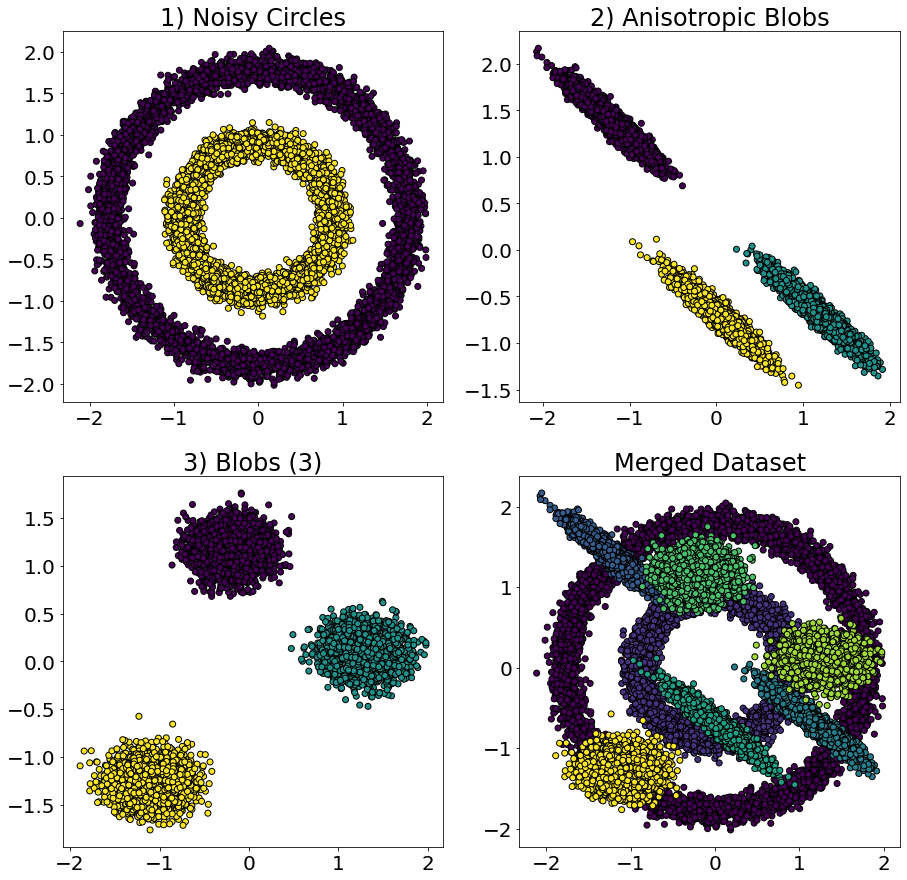

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

fig, axes = plt.subplots(2,2, figsize=(15,15))
axes[0,0].scatter(noisy_circles_df["x-coord"], noisy_circles_df["y-coord"], c=noisy_circles_df["label"], edgecolor='k')
axes[0,0].set_title('1) Noisy Circles')
axes[0,1].scatter(tmp["x-coord"], tmp["y-coord"], c=tmp["label"], edgecolor='k')
axes[0,1].set_title('2) Anisotropic Blobs')
axes[1,0].scatter(tmp2["x-coord"], tmp2["y-coord"], c=tmp2["label"], edgecolor='k')
axes[1,0].set_title('3) Blobs (3)')
axes[1,1].scatter(ultimate_df["x-coord"], ultimate_df["y-coord"], c=ultimate_df["label"], edgecolor='k')
axes[1,1].set_title('Merged Dataset')

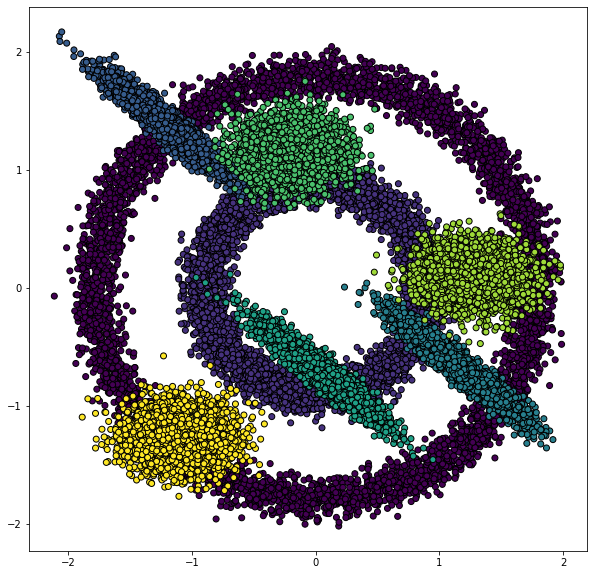

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(ultimate_df["x-coord"], ultimate_df["y-coord"], c=ultimate_df["label"], edgecolor='k')

now let's save everything

In [ ]:
# save everything
noisy_circles_df.to_csv(DATA_PATH+"noisy_circles.csv",index=False, header=False)
init_noisy_circles_df.to_csv(DATA_PATH+"init_noisy_circles.csv",index=False, header=False)

noisy_moons_df.to_csv(DATA_PATH+"noisy_moons.csv",index=False, header=False)
init_noisy_moons_df.to_csv(DATA_PATH+"init_noisy_moons.csv",index=False, header=False)

blobs_df.to_csv(DATA_PATH+"blobs.csv",index=False, header=False)
init_blobs_df.to_csv(DATA_PATH+"init_blobs.csv",index=False, header=False)

aniso_df.to_csv(DATA_PATH+"aniso.csv",index=False, header=False)
init_aniso_df.to_csv(DATA_PATH+"init_aniso.csv",index=False, header=False)

varied_df.to_csv(DATA_PATH+"varied.csv",index=False, header=False)
init_varied_df.to_csv(DATA_PATH+"init_varied.csv",index=False, header=False)

blobs5_2d_df.to_csv(DATA_PATH+"blobs5_2d.csv",index=False, header=False)
init_blobs5_2d_df.to_csv(DATA_PATH+"init_blobs5_2d.csv",index=False, header=False)

blobs5_3d_df.to_csv(DATA_PATH+"blobs5_3d.csv",index=False, header=False)
init_blobs5_3d_df.to_csv(DATA_PATH+"init_blobs5_3d.csv",index=False, header=False)

blobs3_noisy_df.to_csv(DATA_PATH+"blobs3_noisy.csv",index=False, header=False)
init_blobs3_noisy_df.to_csv(DATA_PATH+"init_blobs3_noisy.csv",index=False, header=False)

blobs3_10d_df.to_csv(DATA_PATH+"blobs3_10d.csv",index=False, header=False)
init_blobs3_10d_df.to_csv(DATA_PATH+"init_blobs3_10d.csv",index=False, header=False)

# the initial for ultimate_df is same as noisy_circles_df
ultimate_df.to_csv(DATA_PATH+"ultimate.csv",index=False, header=False)
init_noisy_circles_df.to_csv(DATA_PATH+"init_ultimate.csv",index=False, header=False)

In [ ]:
ultimate_df['label'].unique()

array([1, 0, 2, 3, 4, 5, 6, 7])

In [ ]:
init_noisy_circles_df.describe()

,x-coord,y-coord,label
count,500.000000,500.000000,500.000000
mean,0.018175,-0.031590,0.500000
std,0.982096,1.016437,0.500501
min,-1.920812,-1.863828,0.000000
25%,-0.757434,-0.808049,0.000000
50%,-0.041421,-0.054042,0.500000
75%,0.786205,0.746703,1.000000
max,1.973237,1.926162,1.000000


# Plot Generated Datasets

Text(0.5, 1.0, 'Varied Blobs')

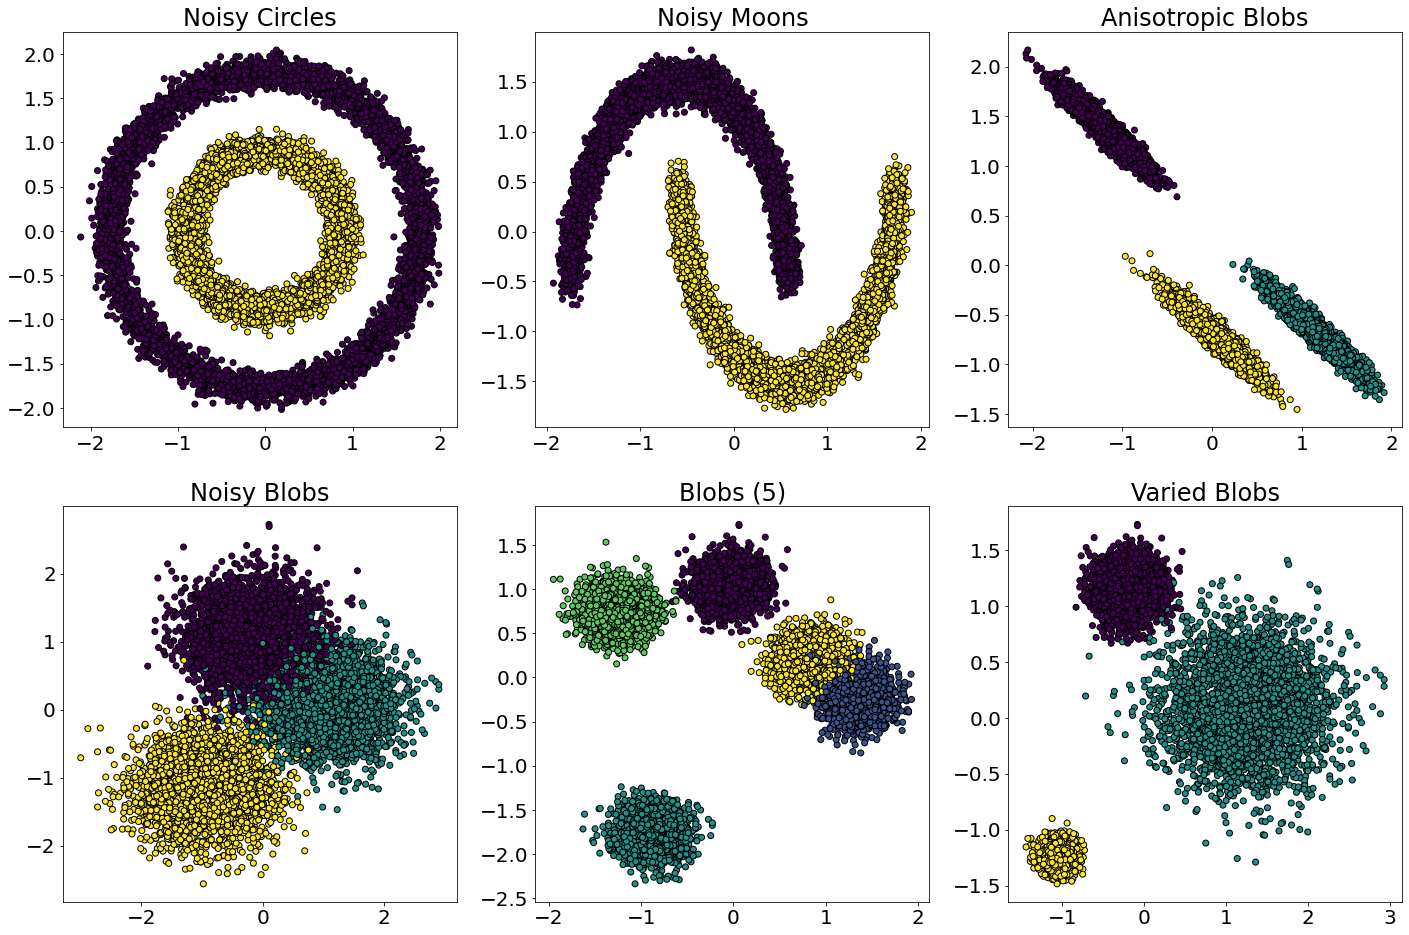

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(2, 3, figsize=(24, 16))
# ['blobs5_2d','blobs3_noisy','varied', 'aniso','noisy_circles','noisy_moons','ultimate'] 

# noisy_circles
ax[0,0].scatter(noisy_circles_df["x-coord"], noisy_circles_df["y-coord"], c=noisy_circles_df["label"], edgecolor='k')
ax[0,0].set_title('Noisy Circles')
# noisy_moons
ax[0,1].scatter(noisy_moons_df["x-coord"], noisy_moons_df["y-coord"], c=noisy_moons_df["label"], edgecolor='k')
ax[0,1].set_title('Noisy Moons')
# aniso_df
ax[0,2].scatter(aniso_df["x-coord"], aniso_df["y-coord"], c=aniso_df["label"], edgecolor='k')
ax[0,2].set_title('Anisotropic Blobs')
# blobs3_noisy
ax[1,0].scatter(blobs3_noisy_df["x-coord"], blobs3_noisy_df["y-coord"], c=blobs3_noisy_df["label"], edgecolor='k')
ax[1,0].set_title('Noisy Blobs')
# blobs5_2d
ax[1,1].scatter(blobs5_2d_df["x-coord"], blobs5_2d_df["y-coord"], c=blobs5_2d_df["label"], edgecolor='k')
ax[1,1].set_title('Blobs (5)')
# varied
ax[1,2].scatter(varied_df["x-coord"], varied_df["y-coord"], c=varied_df["label"], edgecolor='k')
ax[1,2].set_title('Varied Blobs')

#### circles

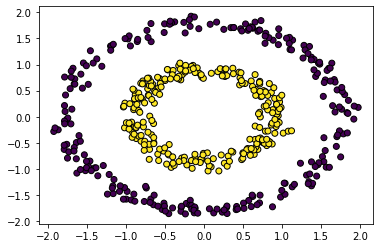

In [ ]:
# init circles
plt.scatter(init_noisy_circles_df["x-coord"], init_noisy_circles_df["y-coord"], c=init_noisy_circles_df["label"], edgecolor='k')

#### moons

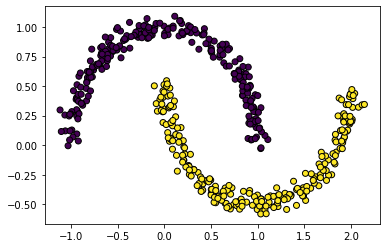

In [ ]:
# noisy_moons init_
plt.scatter(init_noisy_moons_df["x-coord"], init_noisy_moons_df["y-coord"], c=init_noisy_moons_df["label"], edgecolor='k')

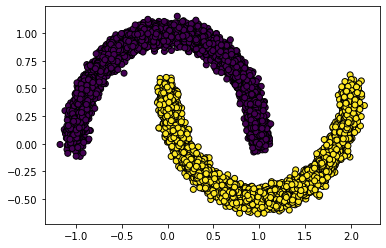

In [ ]:
# noisy_moons
plt.scatter(noisy_moons_df["x-coord"], noisy_moons_df["y-coord"], c=noisy_moons_df["label"], edgecolor='k')

#### blobs

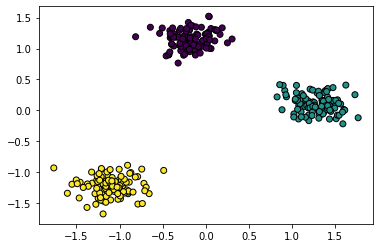

In [ ]:
# blobs init_
plt.scatter(init_blobs_df["x-coord"], init_blobs_df["y-coord"], c=init_blobs_df["label"], edgecolor='k')

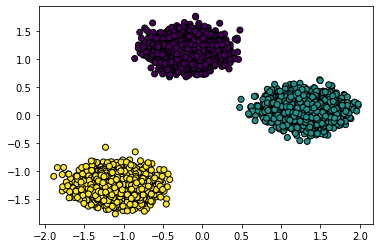

In [ ]:
# blobs
plt.scatter(blobs_df["x-coord"], blobs_df["y-coord"], c=blobs_df["label"], edgecolor='k')

#### aniso

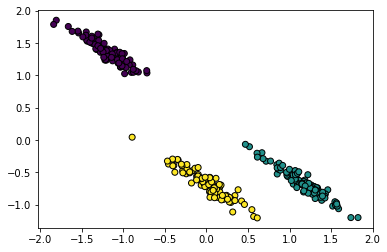

In [ ]:
# aniso init_
plt.scatter(init_aniso_df["x-coord"], init_aniso_df["y-coord"], c=init_aniso_df["label"], edgecolor='k')

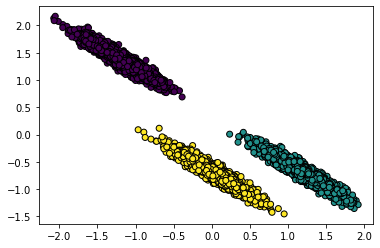

In [ ]:
# aniso
plt.scatter(aniso_df["x-coord"], aniso_df["y-coord"], c=aniso_df["label"], edgecolor='k')

#### varried

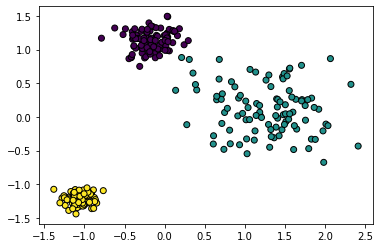

In [ ]:
# varied init_
plt.scatter(init_varied_df["x-coord"], init_varied_df["y-coord"], c=init_varied_df["label"], edgecolor='k')

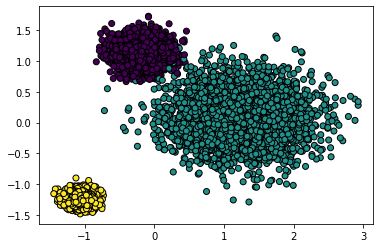

In [ ]:
# varied
plt.scatter(varied_df["x-coord"], varied_df["y-coord"], c=varied_df["label"], edgecolor='k')

#### blobs5_2d

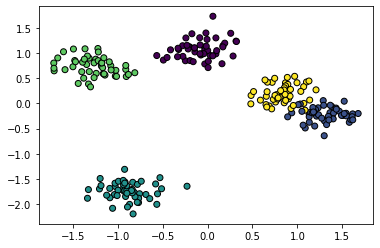

In [ ]:
# blobs5_2d init_
plt.scatter(init_blobs5_2d_df["x-coord"], init_blobs5_2d_df["y-coord"], c=init_blobs5_2d_df["label"], edgecolor='k')

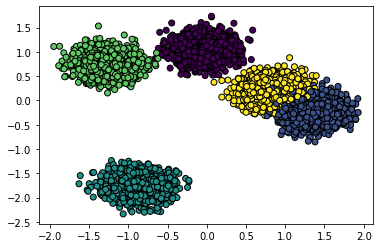

In [ ]:
# blobs5_2d
plt.scatter(blobs5_2d_df["x-coord"], blobs5_2d_df["y-coord"], c=blobs5_2d_df["label"], edgecolor='k')

#### blobs5_3d

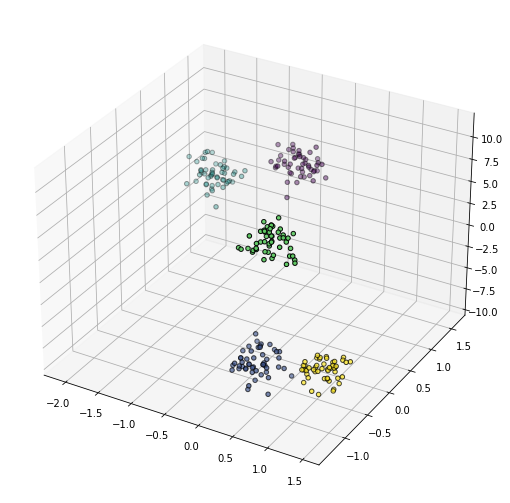

In [ ]:
# blobs5_3d init_
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(init_blobs5_3d_df["x-coord"], init_blobs5_3d_df["y-coord"], init_blobs5_3d_df["z-coord"], c=init_blobs5_3d_df["label"], edgecolor='k')

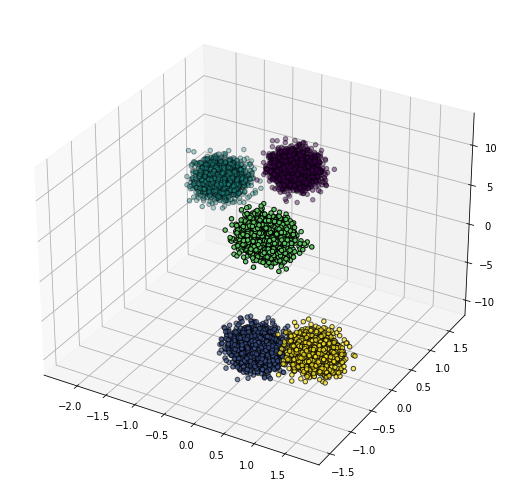

In [ ]:
# blobs5_3d
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(blobs5_3d_df["x-coord"], blobs5_3d_df["y-coord"], blobs5_3d_df["z-coord"], c=blobs5_3d_df["label"], edgecolor='k')

#### Noisy Blobs (3) dataset 

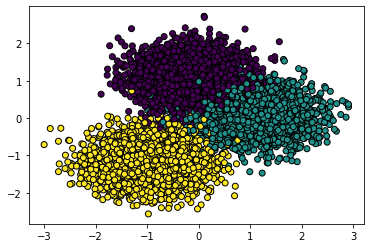

In [ ]:
# blobs3_noisy
plt.scatter(blobs3_noisy_df["x-coord"], blobs3_noisy_df["y-coord"], c=blobs3_noisy_df["label"], edgecolor='k')

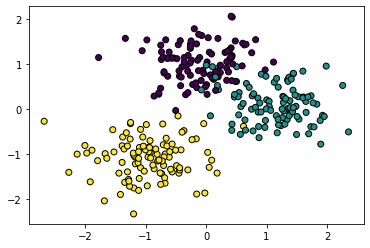

In [ ]:
# blobs3_noisy init_
plt.scatter(init_blobs3_noisy_df["x-coord"], init_blobs3_noisy_df["y-coord"], c=init_blobs3_noisy_df["label"], edgecolor='k')

# Real World -\ Kdd

- https://scikit-learn.org/stable/datasets/real_world.html#kddcup-99-dataset

In [ ]:
from sklearn.datasets import fetch_kddcup99
# SF, SA
kdd99 = fetch_kddcup99(subset=None, random_state=random_state, as_frame=True)
kdd99_df,y = kdd99.data, kdd99.target
kdd99_df['label'] = y

#### Change labels from string etc. into ints and keep them in kdd99_cluster_id 

In [ ]:
y = y.apply(lambda x: str(x).split("'")[1][:-1])
kdd99_cluster_id = {}
for i, cl_name in enumerate(y.unique()):
    kdd99_cluster_id[cl_name] = i
kdd99_df['label'] = y
kdd99_df = kdd99_df.replace({"label":kdd99_cluster_id})
kdd99_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,b'tcp',b'http',b'SF',310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.0,0.01,0.0,0.0,0
494017,0,b'tcp',b'http',b'SF',282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,0
494018,0,b'tcp',b'http',b'SF',203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0
494019,0,b'tcp',b'http',b'SF',291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0


In [ ]:
kdd99_cluster_id

{'back': 13,
 'buffer_overflow': 1,
 'ftp_write': 12,
 'guess_passwd': 6,
 'imap': 14,
 'ipsweep': 10,
 'land': 11,
 'loadmodule': 2,
 'multihop': 18,
 'neptune': 4,
 'nmap': 17,
 'normal': 0,
 'perl': 3,
 'phf': 16,
 'pod': 7,
 'portsweep': 9,
 'rootkit': 22,
 'satan': 15,
 'smurf': 5,
 'spy': 21,
 'teardrop': 8,
 'warezclient': 20,
 'warezmaster': 19}

#### Remove columns 

In [ ]:
kdd99_df = kdd99_df.drop(columns=['protocol_type', 'service', 'flag'],axis=1).astype('float')
kdd99_df['label'] = kdd99_df['label'].astype('int')
kdd99_df.dtypes

duration                       float64
src_bytes                      float64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate            

#### Apply z_score create init data and save

In [ ]:
def z_scoreKDD(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.select_dtypes(exclude=['int64']).columns: # don't scale the label...
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std
kdd99_df = z_scoreKDD(kdd99_df)
kdd99_df = kdd99_df.dropna(axis=1)
kdd99_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.067792,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396977,-0.005679,...,-1.694313,0.599396,-0.282866,-1.022076,-0.158629,-0.464417,-0.463202,-0.252039,-0.249464,0
1,-0.067792,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396977,-0.005679,...,-1.600009,0.599396,-0.282866,-1.146736,-0.158629,-0.464417,-0.463202,-0.252039,-0.249464,0
2,-0.067792,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396977,-0.005679,...,-1.505706,0.599396,-0.282866,-1.188290,-0.158629,-0.464417,-0.463202,-0.252039,-0.249464,0
3,-0.067792,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396977,-0.005679,...,-1.411402,0.599396,-0.282866,-1.188290,-0.158629,-0.464417,-0.463202,-0.252039,-0.249464,0
4,-0.067792,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396977,-0.005679,...,-1.317098,0.599396,-0.282866,-1.209066,-0.158629,-0.464417,-0.463202,-0.252039,-0.249464,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.067792,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396977,-0.005679,...,0.625557,0.599396,-0.282866,-1.229843,1.028093,-0.464417,-0.436950,-0.252039,-0.249464,0
494017,-0.067792,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396977,-0.005679,...,0.625557,0.599396,-0.282866,-0.897416,1.028093,-0.464417,-0.436950,-0.252039,-0.249464,0
494018,-0.067792,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396977,-0.005679,...,0.625557,0.599396,-0.282866,-1.125960,1.028093,-0.306768,-0.436950,-0.252039,-0.249464,0
494019,-0.067792,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396977,-0.005679,...,0.625557,0.599396,-0.282866,-1.167513,1.028093,-0.359318,-0.436950,-0.252039,-0.249464,0


In [ ]:
init_kdd99_df = kdd99_df.sample(n=1000, random_state=random_state)
init_kdd99_df = init_kdd99_df.dropna(axis=1)
init_kdd99_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
317921,-0.067792,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417191,-0.005679,...,0.625557,0.599396,-0.282866,0.827047,-0.158629,-0.464417,-0.463202,-0.252039,-0.249464,5
171422,-0.067792,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417191,-0.005679,...,0.625557,0.599396,-0.282866,0.827047,-0.158629,-0.464417,-0.463202,-0.252039,-0.249464,5
312181,-0.067792,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417191,-0.005679,...,0.625557,0.599396,-0.282866,0.827047,-0.158629,-0.464417,-0.463202,-0.252039,-0.249464,5
87346,-0.067792,-0.002713,0.137726,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396977,-0.005679,...,0.625557,0.599396,-0.282866,-1.229843,0.316060,-0.464417,-0.463202,-0.252039,-0.249464,0
57449,-0.067792,-0.003062,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417191,-0.005679,...,-1.760325,-1.810648,0.357812,-1.250620,-0.158629,2.163061,2.162025,-0.252039,-0.249464,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203568,-0.067792,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417191,-0.005679,...,0.625557,0.599396,-0.282866,0.827047,-0.158629,-0.464417,-0.463202,-0.252039,-0.249464,5
324555,-0.067792,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417191,-0.005679,...,0.625557,0.599396,-0.282866,0.827047,-0.158629,-0.464417,-0.463202,-0.252039,-0.249464,5
379433,-0.067792,-0.003062,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417191,-0.005679,...,-1.609440,-1.664585,0.174761,-1.250620,-0.158629,2.163061,2.162025,-0.252039,-0.249464,4
108854,-0.067792,-0.003062,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417191,-0.005679,...,-1.732034,-1.786304,0.357812,-1.250620,-0.158629,2.163061,2.162025,-0.252039,-0.249464,4


In [ ]:
# unique labels
init_kdd99_df['label'].unique()

array([ 5,  0,  4, 13, 15, 20, 17, 10,  9])

In [ ]:
# save
kdd99_df.to_csv(DATA_PATH+"kdd99.csv",index=False, header=False)
init_kdd99_df.to_csv(DATA_PATH+"init_kdd99.csv",index=False, header=False)